<a href="https://colab.research.google.com/github/Inyrkz/Movie-Similarity/blob/master/Movie_Similarity_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [17]:
#Importing Libraries
import nltk
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(5)


#Read Wiki_plot and IMDb plot (technically the whole dataset)
movies_wi = '/content/drive/My Drive/Mydataset/movies.csv'
movies_wi = pd.read_csv('/content/drive/My Drive/Mydataset/movies.csv', index_col = 0)
#index_col=0 to remove the index column


#Printing the number of movies loaded
print("Total number of movies loaded: %s" % (len(movies_wi)))

#Let's display the data
movies_wi.head()

Total number of movies loaded: 100


,title,genre,wiki_plot,imdb_plot
rank,,,,
0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [18]:
#view the information of the data
movies_wi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
title        100 non-null object
genre        100 non-null object
wiki_plot    100 non-null object
imdb_plot    90 non-null object
dtypes: object(4)
memory usage: 3.9+ KB


In [19]:
#view description of the data
movies_wi.describe()

,title,genre,wiki_plot,imdb_plot
count,100,100,100,90
unique,100,61,100,90
top,Network,[u' Drama'],Michael Dorsey (Dustin Hoffman) is a respected...,Judah Ben-Hur (Charlton Heston) is a wealthy m...
freq,1,11,1,1


In [20]:
#Let's combine the wiki_plot and the imdb_plot into one column called plot
movies_wi['plot'] = movies_wi['wiki_plot'].astype(str) + "\n" + movies_wi['imdb_plot'].astype(str)

#Check out the new DataFrame
movies_wi.head()

,title,genre,wiki_plot,imdb_plot,plot
rank,,,,,
0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


In [23]:
#create a new column that shows the number of words in each plot
movies_wi["length"] = movies_wi["plot"].apply(len)

movies_wi.head()  # display the top part of the dataset

,title,genre,wiki_plot,imdb_plot,plot,length
rank,,,,,,
0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit...",26878
1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ...",22533
2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the...",16008
3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight...",16108
4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...,14130


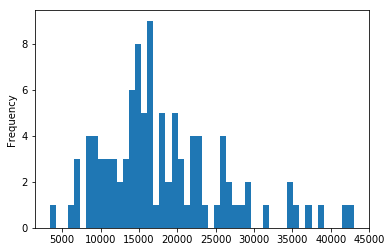

In [24]:
#a histogram that shows the distribution of the number of words
movies_wi["length"].plot.hist(bins = 50)

In [25]:
movies_wi["length"].describe()

count      100.000000
mean     18177.020000
std       8000.486471
min       3377.000000
25%      13305.000000
50%      16240.000000
75%      22105.250000
max      43049.000000
Name: length, dtype: float64

In [27]:
import re #importing re; regular expression

#Importing the SnowballStemmer to perform stemming
from nltk.stem.snowball import SnowballStemmer
iny_stemmer = SnowballStemmer("english")

#Create a function to perform both stemming and tokenization
def tokenize_stem(your_text):
    #we tokenize by sentence first and then by work
    new_token = [y for x in nltk.sent_tokenize(your_text) for y in nltk.word_tokenize(x)]
    
    # Refine token to remove unnecessary characters
    refined_token = [token for token in new_token if re.search('[a-zA-Z]', token)]
    
    #Stem the refined token
    stem_refined = [iny_stemmer.stem(word) for word in refined_token]
    
    return stem_refined


#applying the function to the first five rows of the plot column to see
movies_wi['plot'].head(5).apply(tokenize_stem)

rank
0    [on, the, day, of, his, onli, daughter, 's, we...
1    [in, banker, andi, dufresn, is, convict, of, m...
2    [in, the, german, move, polish, jew, into, the...
3    [in, a, brief, scene, in, an, age, overweight,...
4    [it, is, earli, decemb, american, expatri, ric...
Name: plot, dtype: object

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
#Import TfidfVectorizer to create TF-IDF vectors 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, stop_words='english', use_idf=True, tokenizer=tokenize_stem, ngram_range=(1,3))


In [29]:
#Applying fit and transform of tfidf_vectorizer with the plot of each movie
#Creating a vector representation of the plot summaries

tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in movies_wi["plot"]])
print(tfidf_matrix.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(100, 564)


In [30]:
# To perform clustering, we import k-means
from sklearn.cluster import KMeans

#Create a KMeans object with 5 clusters and save as km
mykm = KMeans(n_clusters = 5)

#Fit the k-means object with tfidf_matrix
mykm.fit(tfidf_matrix)

our_cluster = mykm.labels_.tolist()

#Create a column cluster to represent the generated cluster for each movie
movies_wi["cluster"] = our_cluster

#Display number of films per cluster 
movies_wi["cluster"].value_counts()

2    35
1    21
3    20
0    17
4     7
Name: cluster, dtype: int64

In [0]:
#Importing cosine_similarity to calculate how similar the movie plots are

from sklearn.metrics.pairwise import cosine_similarity

#Calculate the similarity distance
sim_dist = 1 - cosine_similarity(tfidf_matrix)

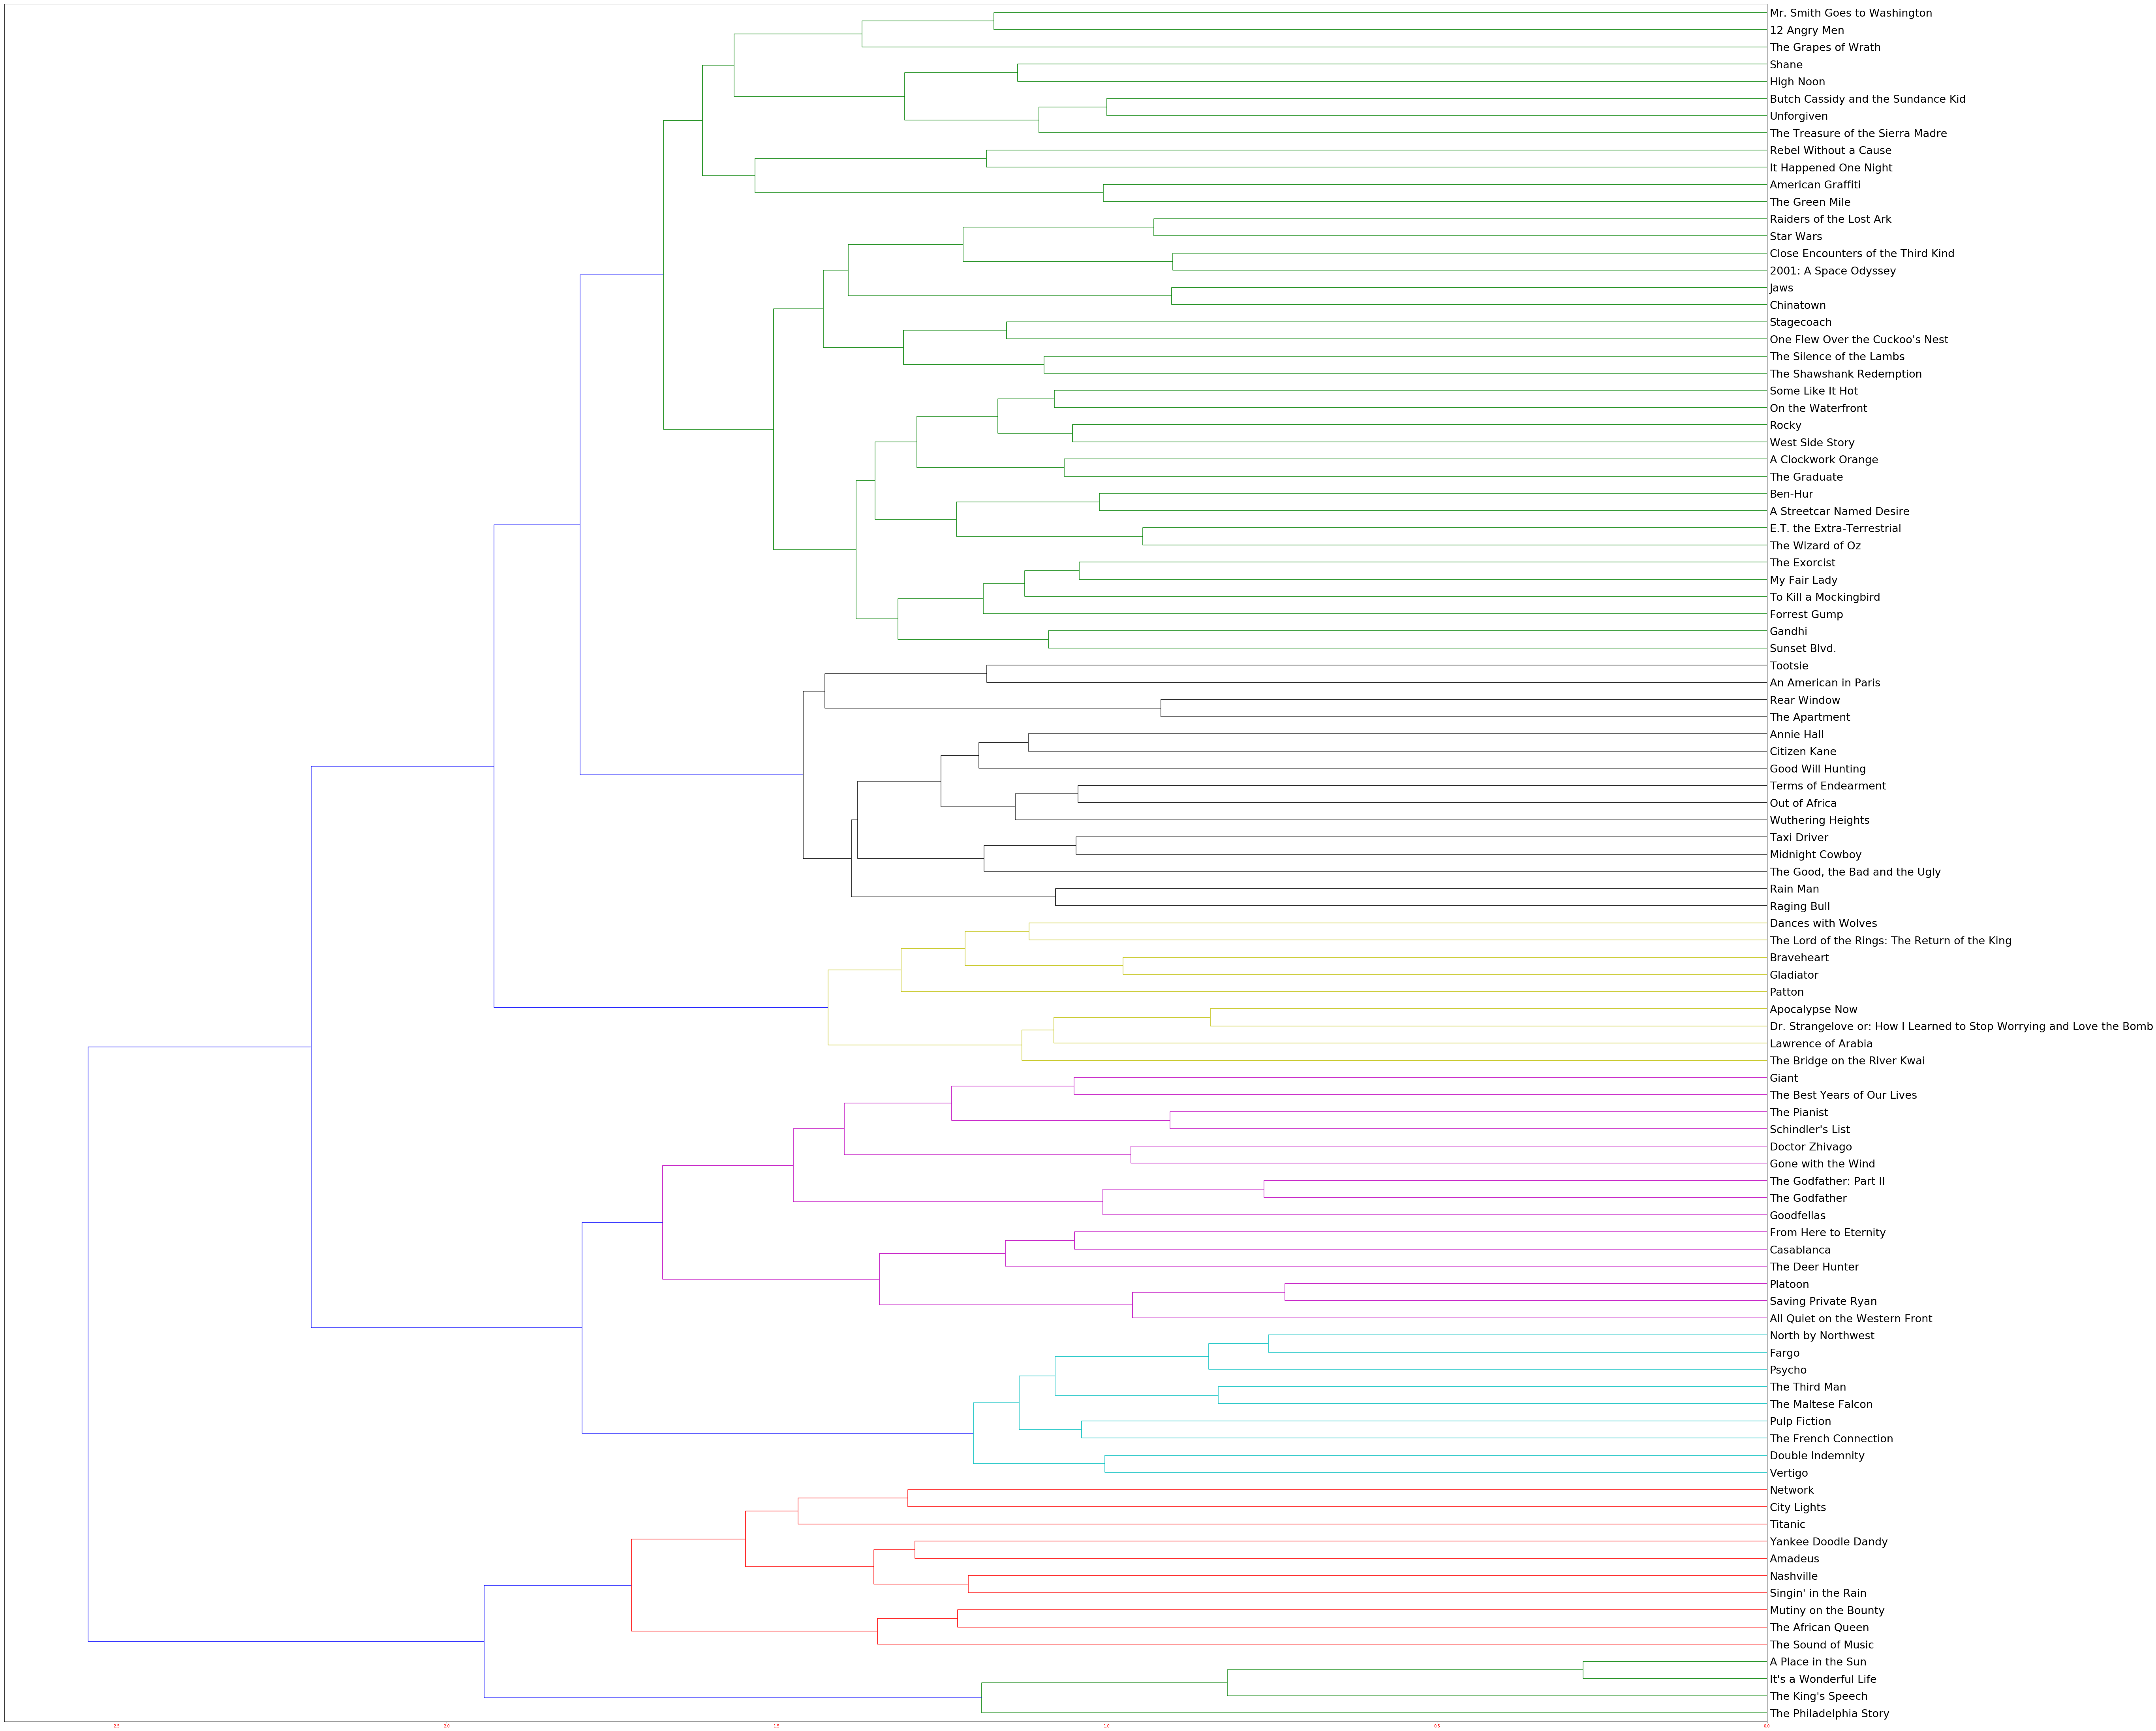

In [32]:
#Importing matplotlib.pyplot to plot graphs
import matplotlib.pyplot as plt

#Set matplotlib to display the output inline
%matplotlib inline

#Importing libraries needed to plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

#Creating mergings matrix
merge_mat = linkage(sim_dist, method = 'complete')

#Plot the dendrogram, using the movie title as label column
dendro = dendrogram(merge_mat, orientation="left", labels = [x for x in movies_wi["title"]], leaf_font_size=27)

#Adjsuting the plot
fig = plt.gcf()
p = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(80, 80)

#Now let's view the plotted dendrogram
plt.show()